# 02 - Tutorial: File preprocessing in detail 

## 0 - Directory set-up
First of all make sure that your current directory is set to "/dance-bits". Below are a few lines that will help you navigate there.

In [23]:
!ls

config	LICENSE  models       README.md		tests
data	logs	 notebooks    requirements.txt	THIRD-PARTY-NOTICES
docs	main.py  __pycache__  src


If that is not the case, uncomment the cell below and use the terminal to navigate to the proper directory.

In [25]:
#%cd dance-bits/

/home/cristina/Code/dance-bits


Check the current directory.

In [26]:
!ls

config	LICENSE  models       README.md		tests
data	logs	 notebooks    requirements.txt	THIRD-PARTY-NOTICES
docs	main.py  __pycache__  src


The current destination must have similar contents as the ones below:

```
config	LICENSE  notebooks    requirements.txt	test.py
data	main.py  __pycache__  src		tests
docs	models	 README.md    test_model.py	THIRD-PARTY-NOTICES
```

If that is the case, comment the terminal navigation cell above `#%cd ..`, so that you do not change the current directory.

## 1 - Preprocessing a single file


### 1.1. Setup for output directories

In [27]:
# Common root data directories
data_folder = "data"
dataset_name = "dataset_test"
raw_dataset_dir = data_folder + '/' + dataset_name

video_name = "test_video.mp4"

interim_folder = "interim"

In [28]:
# Directories for video preprocessing output
keypoints_folder = "video_keypoints"
bonevec_video_folder = "video_example"

output_csv_dir = data_folder + '/' + interim_folder + '/' + keypoints_folder + '/' + dataset_name
output_video_dir = data_folder + '/' + interim_folder + '/' + bonevec_video_folder + '/' + dataset_name

In [29]:
# Directories for audio preprocessing output
audio_specs_folder = "audio_spectrograms" 
audio_filename = video_name[:-4]
audio_folder = data_folder + '/' + interim_folder + '/' + audio_specs_folder + '/' + dataset_name

### 1.2. Video preprocessing 

In [30]:
from src.data import video_preprocessing as vp

In [31]:
vp._process_single_video(video=video_name,
                        input_video_dir=raw_dataset_dir,
                        output_csv_dir=output_csv_dir,
                        output_video_dir=output_video_dir)


libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open swrast: /usr/lib/dri/swrast_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: No such file or directory (search paths /usr/lib/x86_64-linux-gnu/dri:\$${ORIGIN}/dri:/usr/lib/dri, suffix _dri)

libEGL warning: MESA-LOADER: failed to open iris: /usr/lib/dri/iris_dri.so: cannot open shared object file: 

Processed 30 frames.
Processed 60 frames.
Processing complete. Processed 82 frames.
Pose keypoint data saved to data/interim/video_keypoints/dataset_test/test_video_kps.csv
Normalized bone vector data saved to data/interim/video_keypoints/dataset_test/test_video_bvs.csv
Output video saved to data/interim/video_example/dataset_test/test_video_with_pose.mp4


### 2.2 Audio preprocessing

In [20]:
from src.data import audio_preprocessing as ap

In [21]:
ap._process_single_audio(video_file=video_name,
                        video_folder=raw_dataset_dir,
                        audio_folder=audio_folder)


Processing: data/dataset_test/test_video.mp4
Processing video: data/dataset_test/test_video.mp4


MoviePy - Writing audio in data/interim/audio_spectrograms/dataset_test/test_video.wav


MoviePy - Done.
Extracted audio from data/dataset_test/test_video.mp4 and saved it to data/interim/audio_spectrograms/dataset_test/test_video.wav.
Deleted the audio file under data/interim/audio_spectrograms/dataset_test/test_video.wav
Audio preprocessing for data/dataset_test/test_video.mp4 completed.


### 2.3 (Training only) Access ground truth labels

#### ! Attention: The labelling files must have the schema after the CustomDataset object creation 
- Details of the schema can  be found in step 1 of the data preprocessing for training pipeline in tutorial-01. 

- Example of labels.csv with the required schema:
```
file_name,annotator_id,labels
gHO_sFM_c01_d20_mHO1_ch09.mp4,P0,"[1.0681, 2.1116, 3.1551, 4.1986, 5.2421, 6.2855, 8.3725, 10.4595, 12.0247, 13.5899, 14.6334, 15.6768, 16.7203, 17.7638, 18.8073, 19.8508, 20.8942, 21.9377, 22.9812, 24.0247, 25.0681, 26.1116, 27.1551, 29.2421, 31.329, 32.3725]"
gHO_sFM_c01_d20_mHO1_ch09.mp4,P3,"[3.9377, 6.0247, 8.1116, 12.0247, 14.3725, 16.4595, 18.5464, 21.6768, 23.7638, 27.1551, 31.0681]```

Running to LabelProcessor for file gHO_sFM_c01_d20_mHO1_ch09.mp4.



Labels for file: gHO_sFM_c01_d20_mHO1_ch09.mp4

P3: [3.9377, 6.0247, 8.1116, 12.0247, 14.3725, 16.4595, 18.5464, 21.6768, 23.7638, 27.1551, 31.0681]
P4: [1.8508, 3.9377, 6.0247, 8.1116, 10.1986, 12.2855, 14.3725, 16.4595, 18.5464, 20.6334, 21.416, 22.7203, 24.8073, 26.8942, 28.9812, 31.329]
P0: [0.9248, 2.1248, 3.3248, 4.5248, 5.7248, 6.9248, 8.1248]




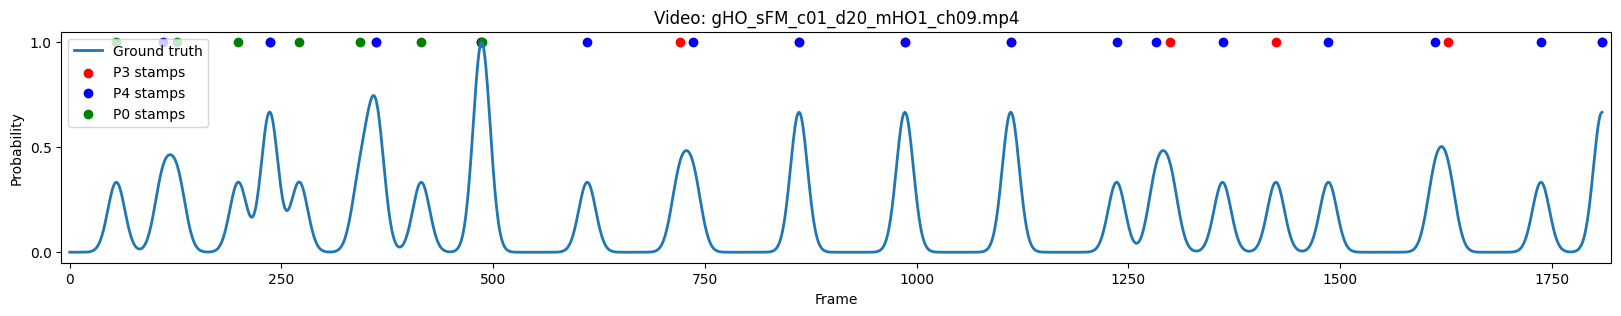

(['gHO_sFM_c01_d20_mHO1_ch09.mp4'],
 [{'P3': array([-1., -1., -1., ..., -1., -1.,  1.]),
   'P4': array([-1., -1., -1., ..., -1., -1.,  1.]),
   'P0': array([-1., -1., -1., ..., -1., -1., -1.])}],
 [array([8.99859501e-08, 1.55190524e-07, 2.64979787e-07, ...,
         6.53465782e-01, 6.63341653e-01, 6.66666667e-01])])

In [32]:
from src.data import preprocess_labels
import os
import pandas as pd

labels_file_name="labels.csv"
audio_path=audio_folder
input_video_dir=raw_dataset_dir

# For further files in the same dataset simply append to the list below.
# Make sure that the added filenames are available in "labels.csv"
video_names = ['gHO_sFM_c01_d20_mHO1_ch09.mp4']

preprocess_labels(labels_file_name=labels_file_name,
                  audio_path=audio_path,
                  input_video_dir=input_video_dir,
                  video_names=video_names,
                  to_plot=True)

